In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
import itertools

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df.head()
train_df.duplicated().sum()
train_df.isnull().sum()
train_df.dtypes

,0
genre_id,int64
ts_listen,int64
media_id,int64
album_id,float64
context_type,float64
release_date,float64
platform_name,float64
platform_family,float64
media_duration,float64
listen_type,float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103040 entries, 0 to 2103039
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   genre_id         int64  
 1   ts_listen        int64  
 2   media_id         int64  
 3   album_id         float64
 4   context_type     float64
 5   release_date     float64
 6   platform_name    float64
 7   platform_family  float64
 8   media_duration   float64
 9   listen_type      float64
 10  user_gender      float64
 11  user_id          float64
 12  artist_id        float64
 13  user_age         float64
 14  is_listened      float64
dtypes: float64(12), int64(3)
memory usage: 240.7 MB


,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
count,2.103040e+06,2.103040e+06,2.103040e+06,2.103039e+06,2.103039e+06,2.103039e+06,2.103039e+06,2.103039e+06,2.103039e+06,2.103039e+06,2.103039e+06,2.103039e+06,2.103039e+06,2.103039e+06,2.103039e+06
mean,2.120871e+03,1.479013e+09,7.872346e+07,8.192806e+06,2.339739e+00,2.011175e+07,4.649728e-01,2.520148e-01,2.323396e+02,3.014547e-01,3.834166e-01,4.068965e+03,1.493134e+06,2.418480e+01,6.878246e-01
std,1.294197e+04,1.190795e+07,5.271948e+07,5.615627e+06,4.606679e+00,7.864946e+04,7.311795e-01,5.455211e-01,6.825458e+01,4.588898e-01,4.862185e-01,3.981150e+03,2.519894e+06,3.795481e+00,4.633811e-01
min,0.000000e+00,2.000000e+00,9.867000e+03,6.558000e+03,0.000000e+00,1.900010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00
25%,0.000000e+00,1.478477e+09,1.256542e+07,1.152698e+06,0.000000e+00,2.009082e+07,0.000000e+00,0.000000e+00,1.970000e+02,0.000000e+00,0.000000e+00,9.020000e+02,2.625000e+03,2.100000e+01,0.000000e+00
50%,2.000000e+00,1.479065e+09,9.465222e+07,9.629010e+06,1.000000e+00,2.014093e+07,0.000000e+00,0.000000e+00,2.250000e+02,0.000000e+00,0.000000e+00,2.766000e+03,2.579470e+05,2.400000e+01,1.000000e+00
75%,2.700000e+01,1.479740e+09,1.289510e+08,1.363320e+07,2.000000e+00,2.016072e+07,1.000000e+00,0.000000e+00,2.540000e+02,1.000000e+00,1.000000e+00,6.107000e+03,1.519461e+06,2.700000e+01,1.000000e+00
max,2.567310e+05,1.480636e+09,1.372601e+08,1.472086e+07,7.100000e+01,2.017031e+07,2.000000e+00,2.000000e+00,8.216000e+03,1.000000e+00,1.000000e+00,1.991600e+04,1.143322e+07,3.000000e+01,1.000000e+00


In [ ]:
num_unique_users = train_df['user_id'].nunique()
print(f"Total unique users: {num_unique_users}")
num_unique_artists = train_df['artist_id'].nunique()
print(f"Total unique artists: {num_unique_artists}")
num_unique_songs = train_df['media_id'].nunique()
print(f"Total unique songs: {num_unique_songs}")
num_unique_platforms = train_df['platform_name'].nunique()
print(f"Total unique platform: {num_unique_platforms}")

Total unique users: 19196
Total unique artists: 27515
Total unique songs: 117808
Total unique platform: 3



Age Statistics:
count    2.923690e+06
mean     2.425236e+01
std      3.781727e+00
min      1.800000e+01
25%      2.100000e+01
50%      2.400000e+01
75%      2.800000e+01
max      3.000000e+01
Name: user_age, dtype: float64

Age Group Percentages:
<20: 21.67%
20-25: 36.45%
25-30: 41.88%
30-35: 0.0%
35-40: 0.0%
40+: 0.0%


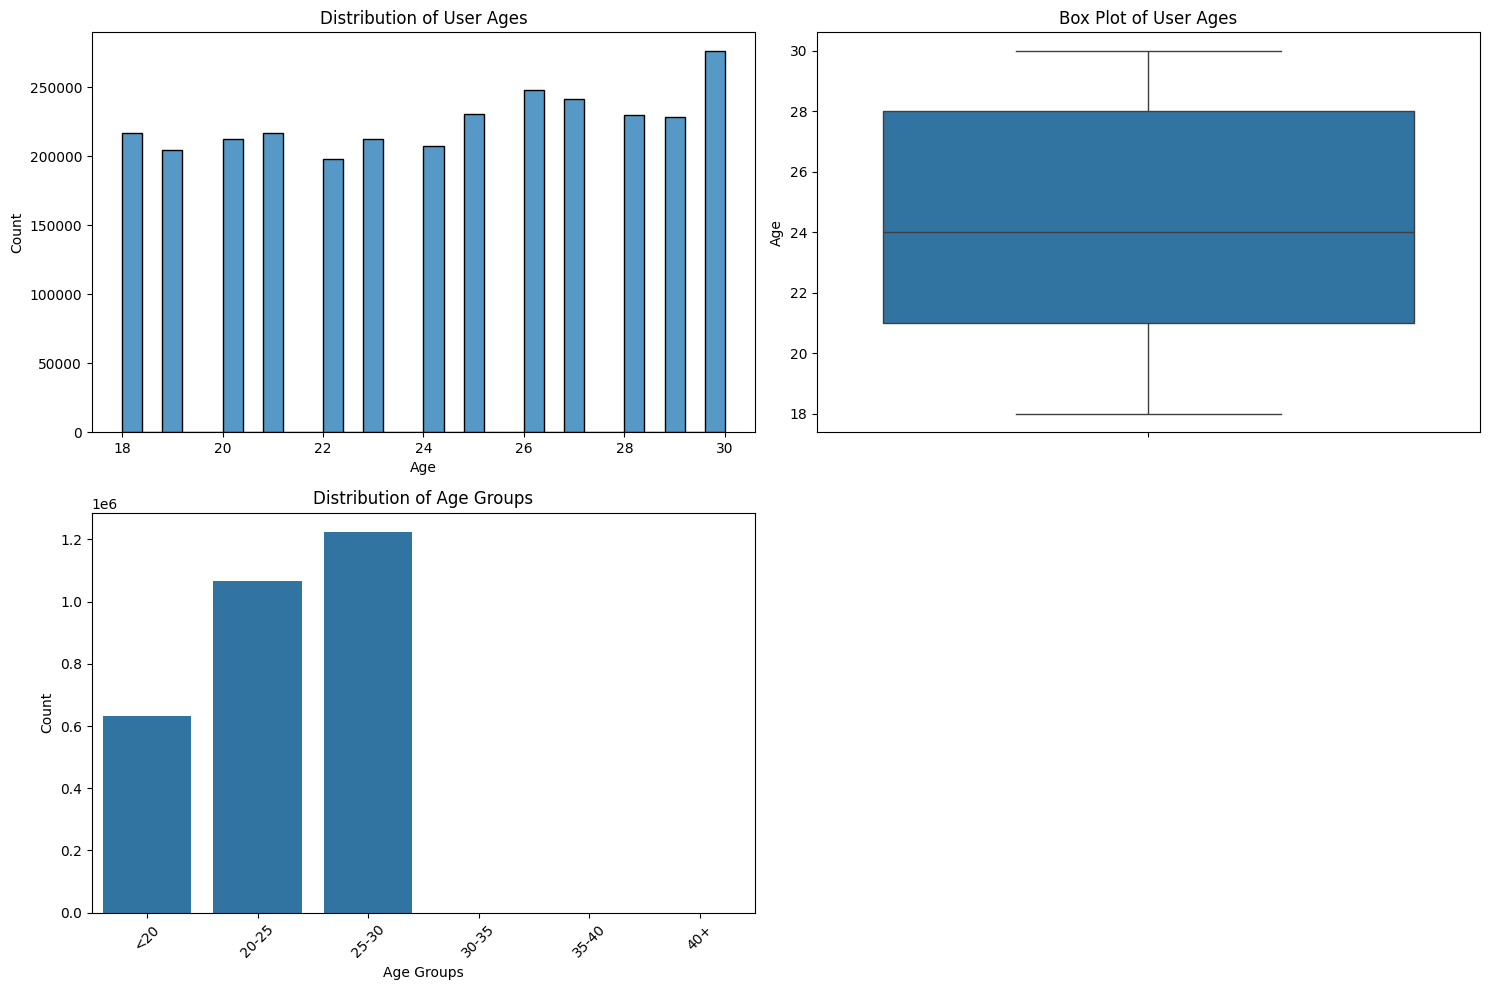


Additional Insights:
Median Age: 24.0
Mode Age: 30.0
Age Range: 18.0 to 30.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
train_df = pd.read_csv('/content/train.csv')

# Create a figure with multiple subplots for different visualizations
plt.figure(figsize=(15, 10))

# Histogram of age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=train_df, x='user_age', bins=30)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')

# Box plot for age distribution
plt.subplot(2, 2, 2)
sns.boxplot(y=train_df['user_age'])
plt.title('Box Plot of User Ages')
plt.ylabel('Age')

# Basic statistics
age_stats = train_df['user_age'].describe()
print("\nAge Statistics:")
print(age_stats)

# Age groups distribution
plt.subplot(2, 2, 3)
age_groups = pd.cut(train_df['user_age'],
                   bins=[0, 20, 25, 30, 35, 40, 100],
                   labels=['<20', '20-25', '25-30', '30-35', '35-40', '40+'])
age_group_counts = age_groups.value_counts().sort_index()
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Calculate percentages for each age group
age_percentages = (age_group_counts / len(train_df) * 100).round(2)
print("\nAge Group Percentages:")
for age_group, percentage in age_percentages.items():
    print(f"{age_group}: {percentage}%")

# Adjust layout
plt.tight_layout()
plt.show()

# Additional insights
print("\nAdditional Insights:")
print(f"Median Age: {train_df['user_age'].median()}")
print(f"Mode Age: {train_df['user_age'].mode().values[0]}")
print(f"Age Range: {train_df['user_age'].min()} to {train_df['user_age'].max()}")

In [ ]:
# For simplicity, assuming every listen is a positive interaction with a rating of 1
train_df['rating'] = 1
# Create a Surprise dataset
reader = Reader(rating_scale=(0, 1))  # Define the rating scale
data = Dataset.load_from_df(train_df[['user_id', 'media_id', 'rating']], reader)

# Split the dataset into the train and test set
trainset, testset = train_test_split(data, test_size=0.2)

In [ ]:
from surprise import Dataset, Reader, SVDpp
from surprise.model_selection import cross_validate

def load_data(file_path):
    df = train_df.copy()

    # Creating an implicit rating system based on listen_type and media_duration
    df['rating'] = df['listen_type'] + (df['media_duration'] / df['media_duration'].max())

    reader = Reader(rating_scale=(0, 5))
    data = Dataset.load_from_df(df[['user_id', 'media_id', 'rating']], reader)
    return data, df
# Matrix factorization
def train_model(data):
    algo = SVDpp()

    # Training on the User-Item Matrix
    trainset = data.build_full_trainset()
    algo.fit(trainset)
    return algo

def get_top_n_recommendations(algo, df, user_id, n=5):
    unique_items = df['media_id'].unique()
    user_rated_items = df[df['user_id'] == user_id]['media_id'].tolist()
    # Making prediction
    items_to_predict = [item for item in unique_items if item not in user_rated_items]
    predictions = [(item, algo.predict(user_id, item).est) for item in items_to_predict]

    top_n = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]
    return top_n

def main():
    file_path = '/content/train.csv'
    data, df = load_data(file_path)
    algo = train_model(data)

    # Get top 5 recommendations for user 1
    user_id = 1
    top_n = get_top_n_recommendations(algo, df, user_id, n=5)
    print(f'Top {len(top_n)} recommendations for user {user_id}:')
    for item, rating in top_n:
        print(f'Media {item} with predicted rating {rating:.2f}')

if __name__ == '__main__':
    main()

Top 5 recommendations for user 1:
Media 131333082 with predicted rating 1.03
Media 4315412 with predicted rating 1.02
Media 133944334 with predicted rating 0.99
Media 115548866 with predicted rating 0.99
Media 131054136 with predicted rating 0.98


# F-score

In [1]:
from surprise import Dataset, Reader, SVDpp
from surprise.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

def calculate_f_score(algo, test_set, threshold=3.5):
    """
    Calculate precision, recall, and F-score for the recommender system.

    Args:
        algo: Trained SVDpp algorithm
        test_set: Test set from surprise library
        threshold: Rating threshold to consider an item as relevant (default: 3.5)

    Returns:
        tuple: (precision, recall, f1_score)
    """
    # Lists to store true and predicted ratings
    y_true = []
    y_pred = []

    # Generate predictions for test set
    for uid, iid, true_r in test_set:
        pred = algo.predict(uid, iid)

        # Convert ratings to binary (relevant/not relevant)
        y_true.append(1 if true_r >= threshold else 0)
        y_pred.append(1 if pred.est >= threshold else 0)

    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred,
                                                             average='binary',
                                                             zero_division=0)

    return precision, recall, f1

def evaluate_recommender(data, n_folds=5):
    """
    Evaluate the recommender system using cross-validation.

    Args:
        data: Surprise dataset object
        n_folds: Number of folds for cross-validation (default: 5)

    Returns:
        dict: Dictionary containing average metrics
    """
    # Lists to store metrics for each fold
    precisions = []
    recalls = []
    f1_scores = []

    # Perform cross-validation
    for fold_idx, (trainset, testset) in enumerate(data.folds(n_folds)):
        # Train the algorithm
        algo = SVDpp()
        algo.fit(trainset)

        # Calculate metrics for this fold
        precision, recall, f1 = calculate_f_score(algo, testset)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        print(f"Fold {fold_idx + 1}:")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1-score: {f1:.3f}\n")

    # Calculate average metrics
    metrics = {
        'avg_precision': np.mean(precisions),
        'avg_recall': np.mean(recalls),
        'avg_f1': np.mean(f1_scores),
        'std_precision': np.std(precisions),
        'std_recall': np.std(recalls),
        'std_f1': np.std(f1_scores)
    }

    return metrics

# Modified main function to include evaluation
def main():
    file_path = '/content/train.csv'
    data, df = load_data(file_path)

    # Evaluate the recommender system
    print("Evaluating recommender system...")
    metrics = evaluate_recommender(data)

    print("\nOverall Performance:")
    print(f"Average Precision: {metrics['avg_precision']:.3f} ± {metrics['std_precision']:.3f}")
    print(f"Average Recall: {metrics['avg_recall']:.3f} ± {metrics['std_recall']:.3f}")
    print(f"Average F1-score: {metrics['avg_f1']:.3f} ± {metrics['std_f1']:.3f}")

    # Train final model and get recommendations
    algo = train_model(data)
    user_id = 1
    top_n = get_top_n_recommendations(algo, df, user_id, n=5)

    print(f'\nTop {len(top_n)} recommendations for user {user_id}:')
    for item, rating in top_n:
        print(f'Media {item} with predicted rating {rating:.2f}')

if __name__ == '__main__':
    main()

ModuleNotFoundError: No module named 'surprise'